# Vyhodnotenie CNN natrénovaného modelu v Google Cloude

V testovania infraštruktúry projektu a dockerizácie sme natrénovali obyčaný CNN model na netriviálnej sade (22000 obrázkov), ktorý sme evaluovali na testovacej sade (cca 2000) obrázkov. Tento model vykonáva binárnu klasifikáciu do dvoch tried.

In [23]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.0.0


## Načítanie datasetu


In [17]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

import sys
if not ('/labs' in sys.path):
    sys.path.append('/labs')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
#%load_ext tensorboard
#%tensorboard --logdir logs --bind_all

In [24]:
from src.data.load_data import DataLoader

batch_size = 32
loader = DataLoader(batch_size=batch_size)

get_dirs(/labs/data/raw/DATASET/TRAIN)
['R', 'O']
get_dirs(/labs/data/raw/DATASET/TEST)
['R', 'O']


## Načítanie natrénovaného modelu
Cnn_model bol natrénovaný prostredníctvom google cloudu, pričom trénovanie zabralo približne 4 hodiny. Model sa trénoval len na 5 epochách.

In [25]:
cnn_model = tf.keras.models.load_model('../models/model.h5')
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

## Evaluácia modelu na 2513 obrázkoch z testovacej sady
Nižšie sme znázornili úspešnosť modelu (87.15%)

In [26]:
loss, acc = cnn_model.evaluate_generator(loader.get_test_data_gen())
print('Restored cnn model, accuracy: {:5.2f}%'.format(100*acc))

Found 2513 images belonging to 2 classes.
Restored cnn model, accuracy: 87.15%


In [70]:
from IPython.display import display, Image
from pathlib import Path
accuracy_per_epoch_path = Path('../logs/cnn_20191117-004209/epoch_accuracy.jpg').resolve()
loss_per_epoch_path = Path('../logs/cnn_20191117-004209/epoch_loss.jpg').resolve()

## Znázornenie úspešnosti v každej epoche počas trénovania

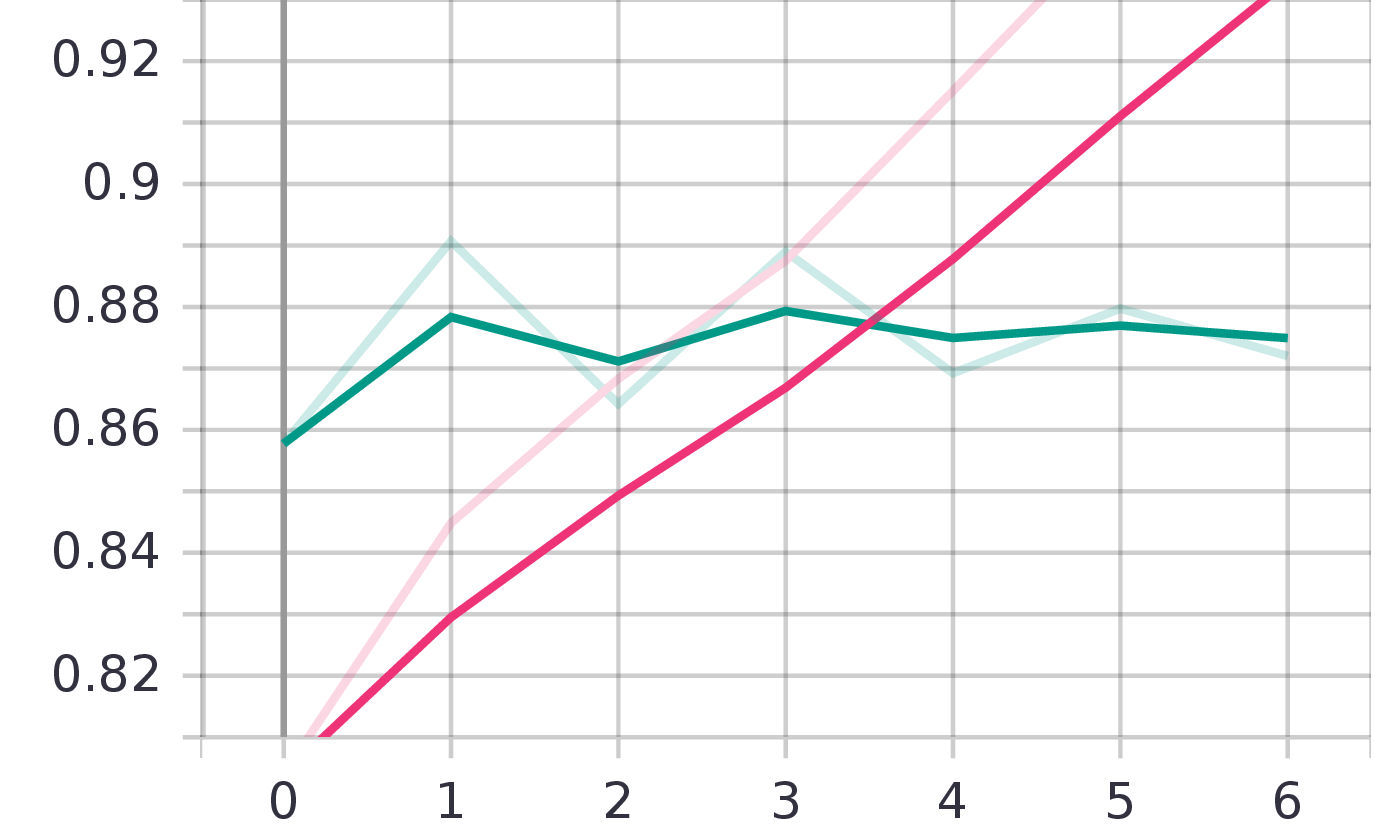

In [68]:
display(Image(filename=str(accuracy_per_epoch_path)))

## Znázornenie loss funkcie v každej epoche počas trénovania

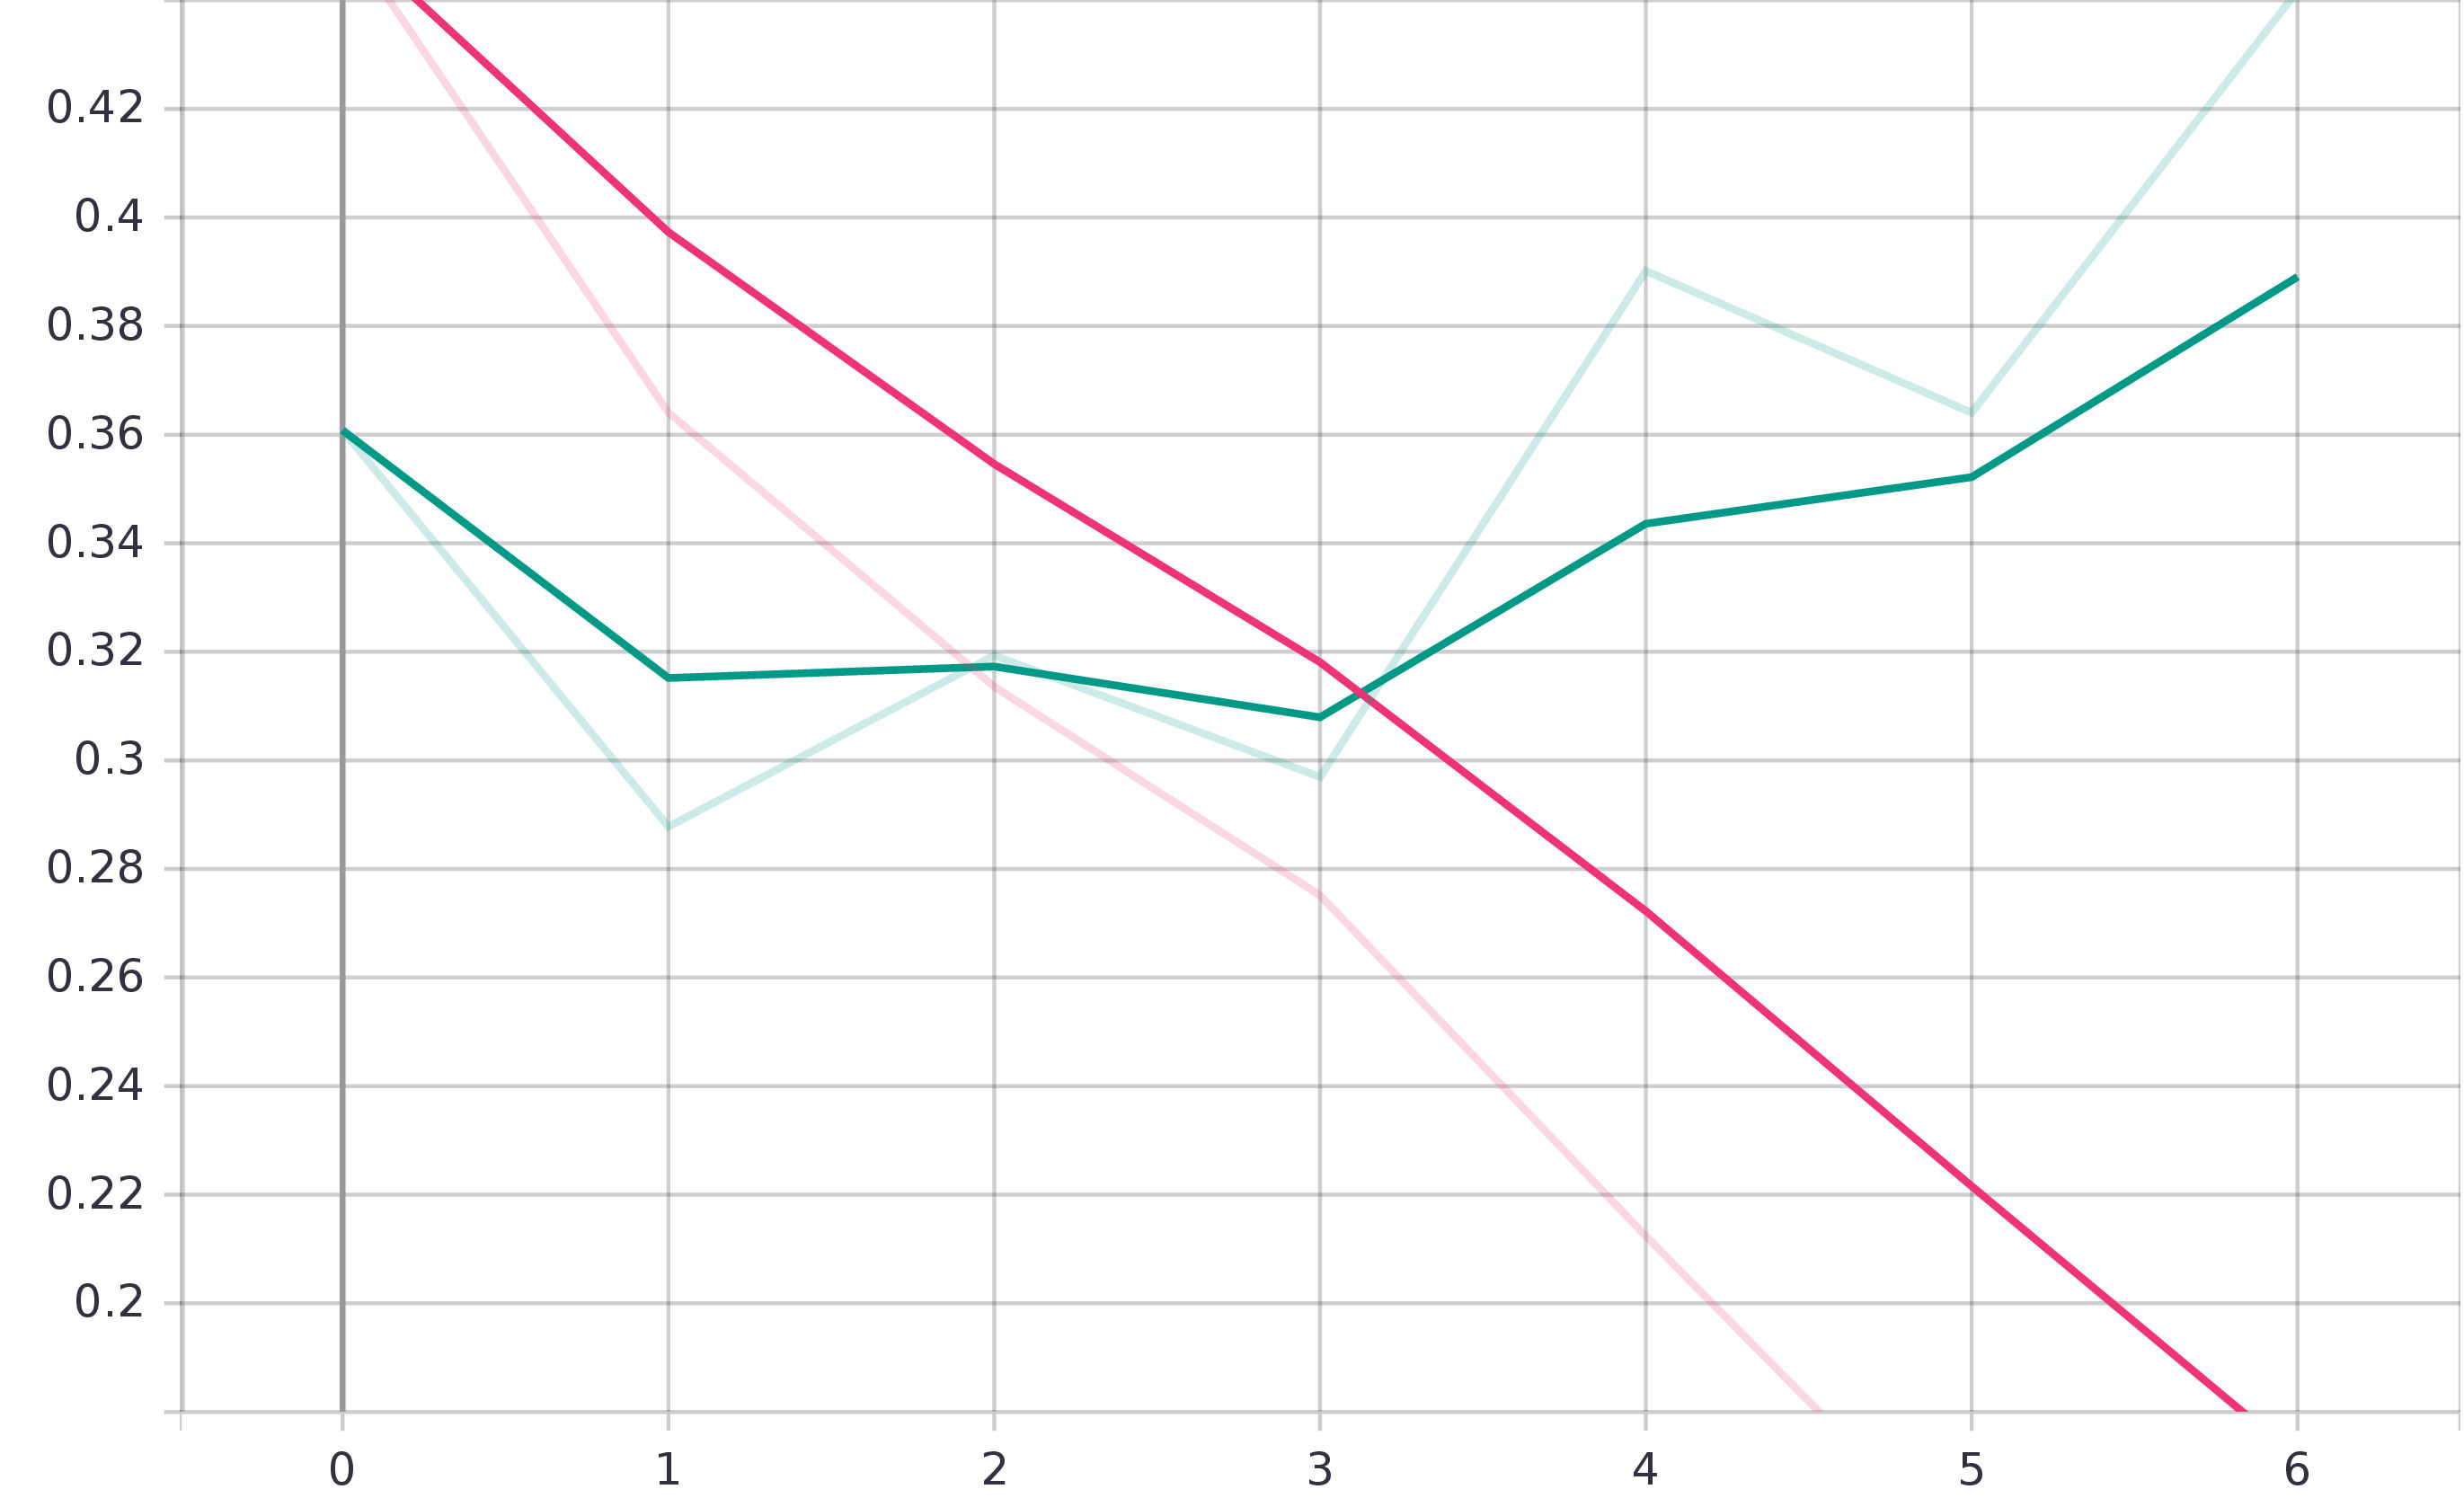

In [69]:
from IPython.display import display, Image
display(Image(filename=str(loss_per_epoch_path)))